In [23]:
import os
import pandas as pd
import sys
import seaborn as sns

base_repo_dir = os.path.abspath("../")
sys.path.append(base_repo_dir)

In [24]:
df = pd.read_csv(str(base_repo_dir) + "/data/rangeland_data_wrk.csv")
df.head()

,shp_id,x_coor,y_coor,aimag_eng,soum_eng,soum_length,soum_area,year,asid,ndvi,...,wgr_smr_gdd5,wgr_smr_wd1,wgr_smr_wd2,water.dummy,desert.dummy,desert.steppe.dummy,mountain.dummy,steppe.dummy,forest.steppe.dummy,taiga.dummy
0,262,108.345238,47.824459,Ulaanbaatar,Baganuur,101.081641,636.926215,1971,1101,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,262,108.345238,47.824459,Ulaanbaatar,Baganuur,101.081641,636.926215,1972,1101,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,262,108.345238,47.824459,Ulaanbaatar,Baganuur,101.081641,636.926215,1973,1101,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,262,108.345238,47.824459,Ulaanbaatar,Baganuur,101.081641,636.926215,1974,1101,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,262,108.345238,47.824459,Ulaanbaatar,Baganuur,101.081641,636.926215,1975,1101,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
train_df = df.dropna(subset = ["bms"])
test_df = df[df["bms"].isna()]

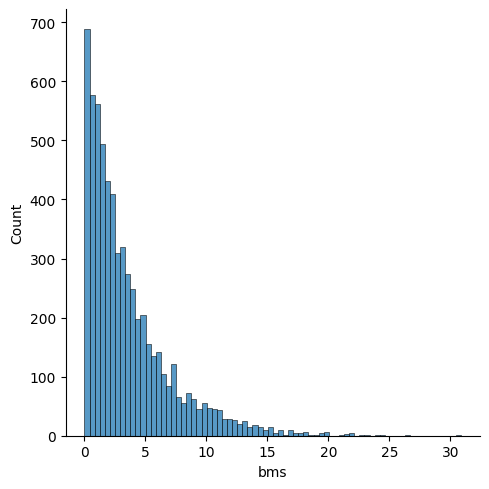

In [30]:
sns.displot(train_df["bms"])

In [31]:
def make_bms_class(
    row
):
    if row < 5:
        return "LOW"
    if row > 5 and row < 10:
        return "MEDIUM"
    if row > 10:
        return "HIGH"

In [33]:
train_df["bms"] = train_df.apply(lambda x: make_bms_class(x["bms"]), axis = 1)

/var/folders/rn/d2868tq11gjbfjp0xwssgqg40000gn/T/ipykernel_72383/878461482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["bms"] = train_df.apply(lambda x: make_bms_class(x["bms"]), axis = 1)


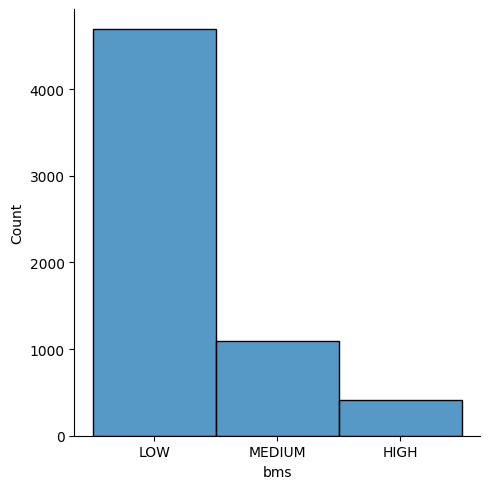

In [34]:
sns.displot(train_df["bms"])

#### Will train on training set
#### Will predict on training set
#### Will evaluate on training set
#### Apply predictions to test set

In [36]:
y_train = train_df["bms"]
x_train = train_df.drop(columns = ["bms"])

In [38]:
import xgboost
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

TypeError: '<' not supported between instances of 'NoneType' and 'str'